In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


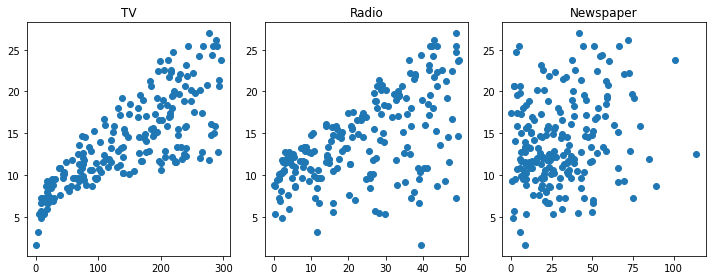

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_title("TV")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_title("Radio")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_title("Newspaper")

plt.tight_layout();

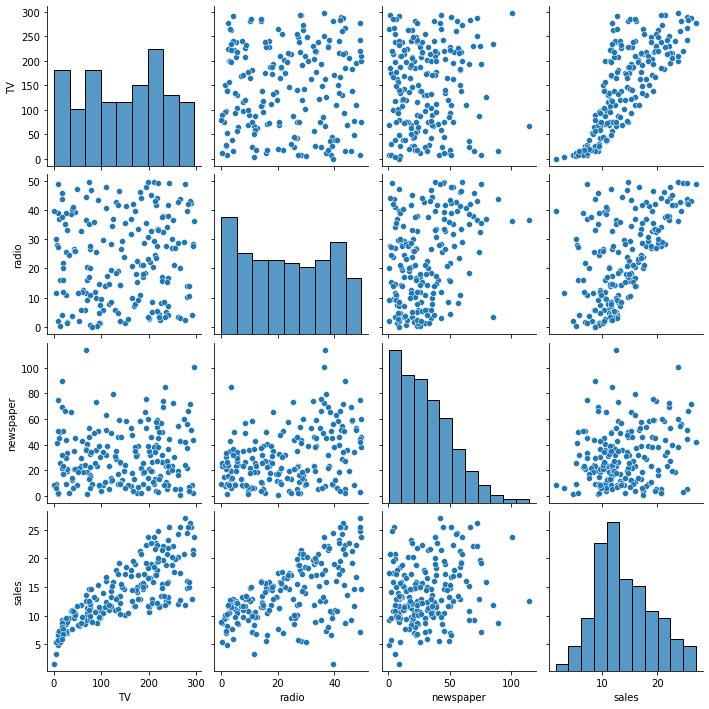

In [5]:
sns.pairplot(df);

In [6]:
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
len(df)

200

In [12]:
len(X_test)

60

In [13]:
# CREATING AN ESTIMATOR IN SKLEARN
from sklearn.linear_model import LinearRegression

In [14]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)  # compare predictions with y_test actual values

In [20]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
df['sales'].mean()

14.0225

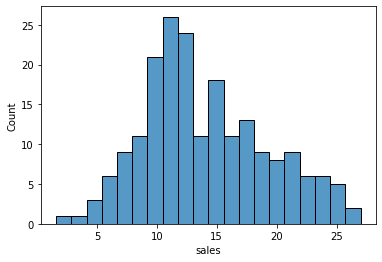

In [26]:
sns.histplot(data=df, x='sales', bins=20);

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.2137457736144808

In [32]:
print(round(100 * mae / df['sales'].mean(), 1), "%")

8.7 %


In [34]:
mse = mean_squared_error(y_test, y_pred)
mse

2.298716697886378

In [35]:
# RMS Error
np.sqrt(mse)

1.5161519375993877

In [36]:
print(round(100 * np.sqrt(mse) / df['sales'].mean(), 1), "%")

10.8 %


In [37]:
test_residuals = y_test - y_pred

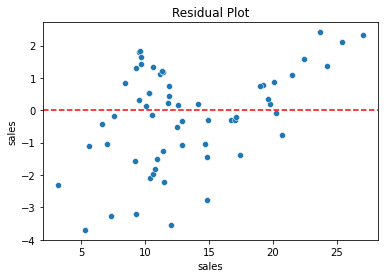

In [49]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='dashed')
plt.title('Residual Plot');

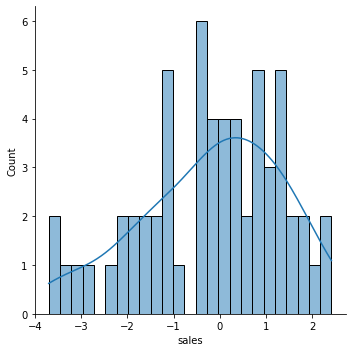

In [43]:
sns.displot(test_residuals, bins=25, kde=True);

In [44]:
import scipy as sp

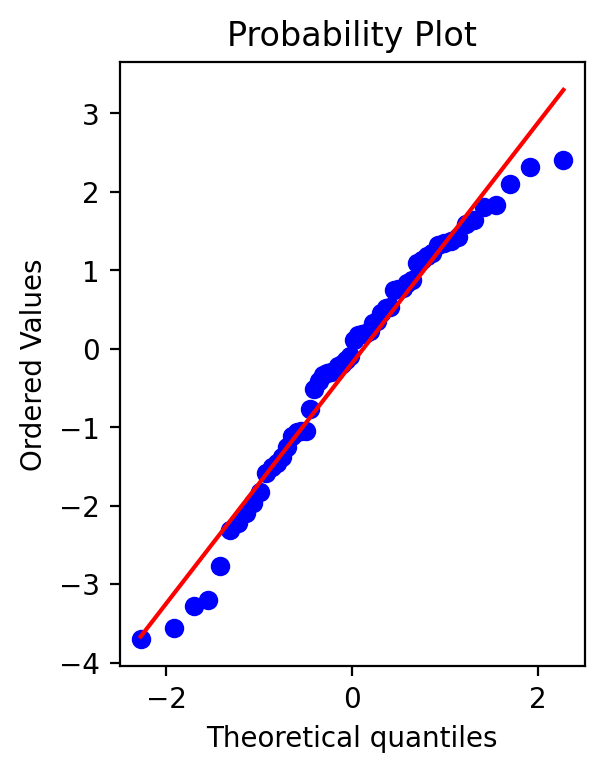

In [46]:
fig, ax = plt.subplots(figsize=(3,4), dpi=200)
_ = sp.stats.probplot(test_residuals, plot=ax)

In [50]:
# MODEL DEPLOYMENT
# (assuming we are satisfied with our "optimized" model)

final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [51]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [53]:
# if you want to compare with the actual spend values in the original dataset
y_hat = final_model.predict(X)

In [54]:
# saving and loading a model
from joblib import dump, load

In [55]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [56]:
# now you can send this model to someone else

In [57]:
loaded_model = load('final_sales_model.joblib')

In [58]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [59]:
X.shape

(200, 3)

In [60]:
# use the loaded model

# spend 149 on TV, 22 on Radio, and 12 on Newspaper
campaign = [[149, 22, 12]]
loaded_model.predict(campaign)

# so we don't know the real sales number until we actually launch the campaign, but this model can help
# us predict the expected sales from this advertising investment.

array([13.893032])